In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy import optimize
import matplotlib.pyplot as plt

<h2 align = 'center' >Определение функций, над которыми будем работать</h2>

<div>Гладкая f(x) и разрывная h(x)</div>

In [2]:
def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2));

def h(x):
    t = (f(x)).astype(int);
    #t = t.astype(int);
    return t;

<div>Графики для наглядности на интервале <i>[0; 30]</i></div>

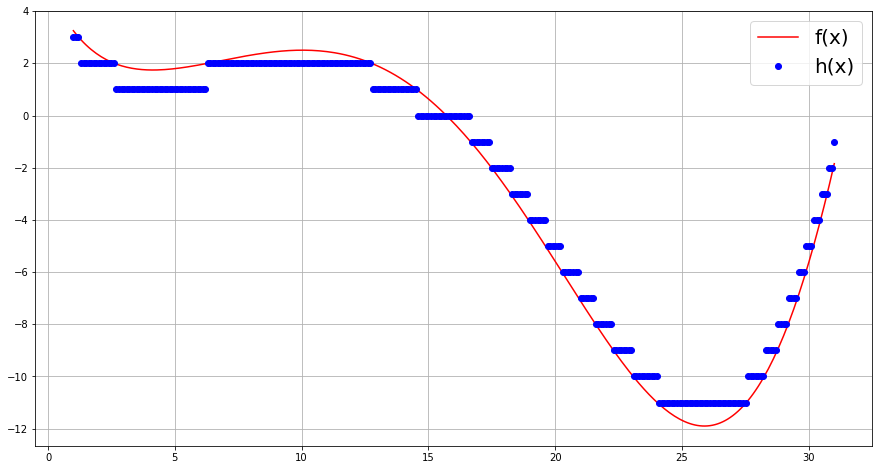

In [28]:
def Draw(x):
    f1 = f(x);
    f2 = h(x);
    plt.figure(figsize=(15,8))
    plt.plot(x,f1,'r-', label = 'f(x)');
    plt.plot(x,f2,'bo', label = 'h(x)');
    plt.legend(fontsize = 20)
    plt.grid(True);
    plt.show()

x = np.arange(1,31.1,0.1);
Draw(x)

<h2 align = 'center'>Определение функций оптимизации и поиска минимума</h2>

<div>Функции для гладких функций: Нелдера-Мида и/или BFGS</div>
<div>Функции для любых графиков: диференциальная эволюция</div>

In [31]:
def SearchMin(fun, x, method = 'nelder-mead'):
    r =  minimize(fun, x, method=method)#, options={'xtol': 1e-8, 'disp': True});
    return r;

def Diff_Evol(fun, bounds):
    return optimize.differential_evolution(fun, bounds)

<div><h3>Задание 1: Поиск минимума и значения функции в минимуме методами Нельдера-Мида и BFGS в точках x = 2 и x = 30</h3></div>

In [40]:
_str = ' x = {:4.2f}:\n>>> NelderMead f(x)\t== {}\n>>> BFGS f(x)\t\t== {}';
print('x.size() == {}'.format(len(x)))
print('***control',_str.format(2, SearchMin(f, 2).fun, SearchMin(f, 2, 'bfgs').fun))
print('***control x = {}:\n>>> BFGS f(x)\t\t== {}'.format(30,SearchMin(f, 30, 'bfgs').fun))

x.size() == 301
***control  x = 2.00:
>>> NelderMead f(x)	== 1.745268290460671
>>> BFGS f(x)		== 1.7452682903447336
***control x = 30:
>>> BFGS f(x)		== -11.898894665981313


<div><h3>Задание 2: Поиск значения функции в минимуме с использованием дифференциальной эволюции в начальной точке x = 30</h3></div>

In [44]:
bounds = [(1, 30)]
r_diff = Diff_Evol(f, bounds)
print('Differential evolution in {} ==> f() = {:4.2f}'.format(bounds,r_diff.fun[0]))

Differential evolution in [(1, 30)] ==> f() = -11.90


<div><h3>Задание 3: использование методов BFGS и дифференциальной эволюции на функции, не имеющей градиента в начальном приближении x = 30</h3></div>

In [35]:
r_bfgs = SearchMin(h, 30., 'bfgs');
r_diff = Diff_Evol(h, bounds)
print('***BFGS\t\t ends in {} itt \t\t>> f_val({})\t = {}'.format(r_bfgs.nfev, r_bfgs.x[0],(r_bfgs.fun[0])))
print('***Diff_Evol\t ends in {} itt \t>> f_val({:4.2f})\t = {}'.format(r_diff.nfev, r_diff.x[0],(r_diff.fun)))

***BFGS		 ends in 3 itt 		>> f_val(30.0)	 = -5
***Diff_Evol	 ends in 77 itt 	>> f_val(26.11)	 = -11.0
